# In pursuit of ESG winners

In [20]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns

In [21]:
df = pd.read_csv('data_v1.csv')
df.head()

,Name,RIC,Exchange,TRBC Sector,Type of Equity,Currency,ISIN,CUSIP/CINS,SEDOL,GICS Sector,...,Operating_Margin,EPS_Growth_5_Years,DPS_Growth_5_Years,PE,Dividend_Yield,Debt_to_Equity,Current_Ratio,Volatility_200_Days,%_Price_Change_Relative_52W_High,%_Price_Change_Relative_52W_Low
0,Oxford Metrics PLC,OMG1.L,London Stock Exchange,Software (NEC),Ordinary Share,British Penny,GB0030312788,G6748U100,3031278,"Information Technology, Software & Services, S...",...,8.66,0.85,15.81,18.02,3.09,0.21,6.80,23.60,33.41,3.85
1,Aptitude Software Group PLC,APTD.L,London Stock Exchange,Application Software,Ordinary Share,British Penny,GB00BJV2F804,G6093X105,BJV2F80,"Information Technology, Software & Services, S...",...,5.54,-25.62,-5.44,61.21,2.09,0.95,1.10,39.28,35.18,3.20
2,Braemar PLC,BRMS.L,London Stock Exchange,Marine Freight & Logistics (NEC),Ordinary Share,British Penny,GB0000600931,G1554N100,0060093,"Industrials, Transportation, Transportation In...",...,9.93,102.34,-8.46,7.75,4.72,1.03,1.23,32.19,33.43,8.37
3,Vertu Motors PLC,VTU.L,London Stock Exchange,"Auto Vehicles, Parts & Service Retailers (NEC)",Ordinary Share,British Penny,GB00B1GK4645,G9337V109,B1GK464,"Consumer Discretionary, Retailing, Specialty R...",...,1.14,3.24,7.47,9.52,3.12,3.05,1.04,30.38,5.78,89.23
4,Watkin Jones PLC,WJG.L,London Stock Exchange,"Real Estate Rental, Development & Operations (...",Ordinary Share,British Penny,GB00BD6RF223,G94793109,BD6RF22,"Real Estate, Real Estate Management & Developm...",...,13.43,-17.90,2.31,3.42,16.93,1.19,2.98,74.64,70.37,2.50


In [22]:
df.columns

Index(['Name', 'RIC', 'Exchange', 'TRBC Sector', 'Type of Equity', 'Currency',
       'ISIN', 'CUSIP/CINS', 'SEDOL', 'GICS Sector', 'Market_Cap_(USD)',
       'Country_of_Issuer', 'ESG_Score', 'Environmental_Pillar_Score',
       'Social_Pillar_Score', 'Governance_Pillar_Score', 'Controversies_Score',
       'Estimated_CO2_Equivalents_Emission', 'Number_of_Employees', 'ROE',
       'Operating_Margin', 'EPS_Growth_5_Years', 'DPS_Growth_5_Years', 'PE',
       'Dividend_Yield', 'Debt_to_Equity', 'Current_Ratio',
       'Volatility_200_Days', '%_Price_Change_Relative_52W_High',
       '%_Price_Change_Relative_52W_Low'],
      dtype='object')

In [23]:

df.isnull().sum()

Name                                   0
RIC                                    0
Exchange                               0
TRBC Sector                            0
Type of Equity                         0
Currency                               0
ISIN                                   0
CUSIP/CINS                             0
SEDOL                                  0
GICS Sector                           17
Market_Cap_(USD)                       0
Country_of_Issuer                      0
ESG_Score                              0
Environmental_Pillar_Score             0
Social_Pillar_Score                    0
Governance_Pillar_Score                0
Controversies_Score                    0
Estimated_CO2_Equivalents_Emission     0
Number_of_Employees                    0
ROE                                    0
Operating_Margin                       0
EPS_Growth_5_Years                     0
DPS_Growth_5_Years                     0
PE                                     0
Dividend_Yield  

In [26]:
df_init_obs_num = df.shape[0]
df = df.dropna()
df_lost_obs_num = df_init_obs_num - df.shape[0]
print("Observations lost after dropping null values: ", df_lost_obs_num)

Observations lost after dropping null values:  0


In [30]:
df.duplicated().sum()


24

In [34]:
duplicate_index = df[df.duplicated()].index
print("Index of duplicate rows:", duplicate_index)

Index of duplicate rows: Index([312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335],
      dtype='int64')
Index of non-duplicate rows: Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       302, 303, 304, 305, 306, 307, 308, 309, 310, 311],
      dtype='int64', length=295)


In [45]:
# print the names that are duplicated
print(df[df.duplicated()]['Name'].values)

# print the rows where the name is Shell PLC
print(df[df['Name'] == 'Shell PLC'])

['Shell PLC' 'AstraZeneca PLC' 'TotalEnergies SE' 'Microsoft Corp'
 'Apple Inc' 'Mastercard Inc' 'Comcast Corp' 'Merck & Co Inc'
 'Cisco Systems Inc' 'Exxon Mobil Corp' 'Coca-Cola Co' 'PepsiCo Inc'
 'TotalEnergies SE' 'Visa Inc' 'Pfizer Inc' 'SAP SE' 'Johnson & Johnson'
 'ASML Holding NV' 'Chevron Corp' 'Walmart Inc' 'Oracle Corp'
 'Procter & Gamble Co' 'Abbott Laboratories' 'Home Depot Inc']
          Name     RIC               Exchange           TRBC Sector  \
67   Shell PLC  SHEL.L  London Stock Exchange  Integrated Oil & Gas   
312  Shell PLC  SHEL.L  London Stock Exchange  Integrated Oil & Gas   

     Type of Equity       Currency          ISIN CUSIP/CINS    SEDOL  \
67   Ordinary Share  British Penny  GB00BP6MXD84  G80827101  BP6MXD8   
312  Ordinary Share  British Penny  GB00BP6MXD84  G80827101  BP6MXD8   

                                           GICS Sector  ... Operating_Margin  \
67   Energy, Oil, Gas & Consumable Fuels, Integrate...  ...            15.43   
312  Energy, 

In [46]:
df = df.drop_duplicates()
df.shape


(295, 30)

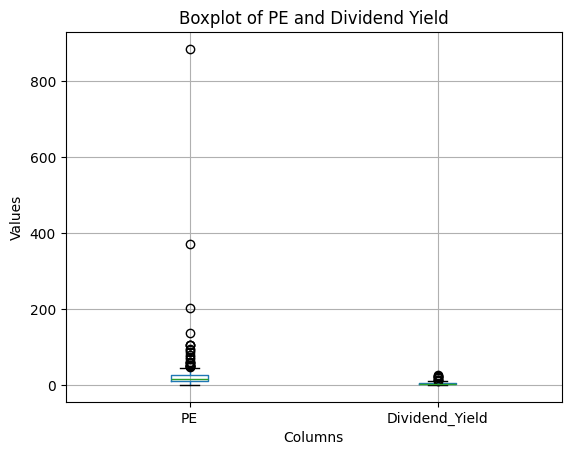

In [49]:

import matplotlib.pyplot as plt

columns = ['PE', 'Dividend_Yield']


df.boxplot(column=columns)

plt.title('Boxplot of PE and Dividend Yield')
plt.xlabel('Columns')
plt.ylabel('Values')


plt.show()